**Section 7A** <br>
2/18/25

In [17]:
import numpy as np
import json
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.stats import expon, norm
from sklearn.mixture import GaussianMixture

# Task 1: Statistical Inference on Biased Coins

**Part a) Bayesian Inference**

In [2]:
# Load datasets
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Load the three datasets
dataset1 = load_json("dataset_1.json")
dataset2 = load_json("dataset_2.json")
dataset3 = load_json("dataset_3.json")

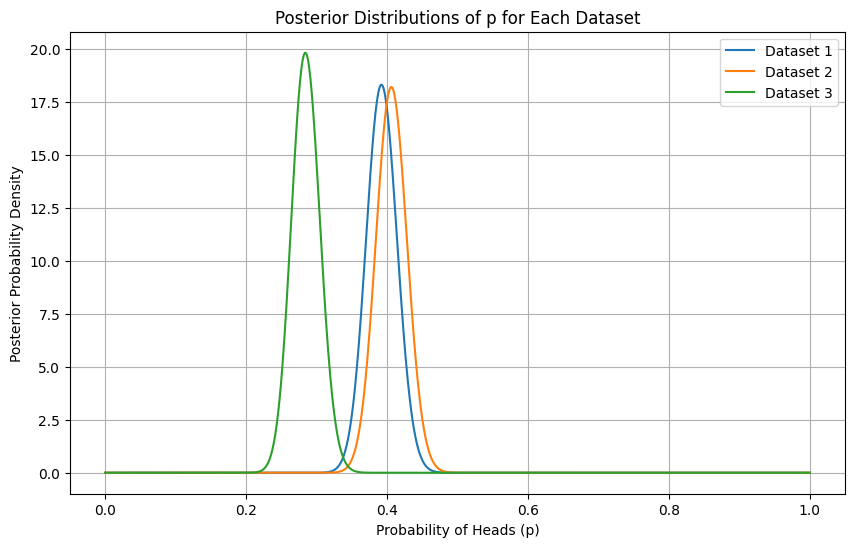

In [4]:
# Function to compute posterior distribution parameters
def compute_posterior(data):
    M = sum(data)  # Count heads (True values)
    N = len(data)  # Total flips (500)
    alpha = M + 1  # Beta(M+1, N-M+1)
    beta = N - M + 1
    return alpha, beta

# Compute posteriors
alpha1, beta1 = compute_posterior(dataset1)
alpha2, beta2 = compute_posterior(dataset2)
alpha3, beta3 = compute_posterior(dataset3)

# Plot posterior distributions
p_values = np.linspace(0, 1, 1000)  # Probability values

plt.figure(figsize=(10,6))

plt.plot(p_values, stats.beta.pdf(p_values, alpha1, beta1), label="Dataset 1")
plt.plot(p_values, stats.beta.pdf(p_values, alpha2, beta2), label="Dataset 2")
plt.plot(p_values, stats.beta.pdf(p_values, alpha3, beta3), label="Dataset 3")

plt.xlabel("Probability of Heads (p)")
plt.ylabel("Posterior Probability Density")
plt.title("Posterior Distributions of p for Each Dataset")
plt.legend()
plt.grid()
plt.show()

In [6]:
def compute_posterior(data):
    M = sum(data)  # Count heads (True values)
    N = len(data)  # Total flips (500)
    alpha = M + 1  # Beta(M+1, N-M+1)
    beta = N - M + 1
    return alpha, beta, M, N

# Compute posteriors
alpha1, beta1, M1, N1 = compute_posterior(dataset1)
alpha2, beta2, M2, N2 = compute_posterior(dataset2)
alpha3, beta3, M3, N3 = compute_posterior(dataset3)

# Expectation and Variance
def beta_stats(alpha, beta):
    expectation = alpha / (alpha + beta)
    variance = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return expectation, variance

E1, Var1 = beta_stats(alpha1, beta1)
E2, Var2 = beta_stats(alpha2, beta2)
E3, Var3 = beta_stats(alpha3, beta3)

# Print results
print("E=Expectation, V=Variance")
print(f"Dataset 1: E[p] = {E1:.4f}, Var[p] = {Var1:.6f}")
print(f"Dataset 2: E[p] = {E2:.4f}, Var[p] = {Var2:.6f}")
print(f"Dataset 3: E[p] = {E3:.4f}, Var[p] = {Var3:.6f}")

E=Expectation, V=Variance
Dataset 1: E[p] = 0.3924, Var[p] = 0.000474
Dataset 2: E[p] = 0.4064, Var[p] = 0.000480
Dataset 3: E[p] = 0.2849, Var[p] = 0.000405


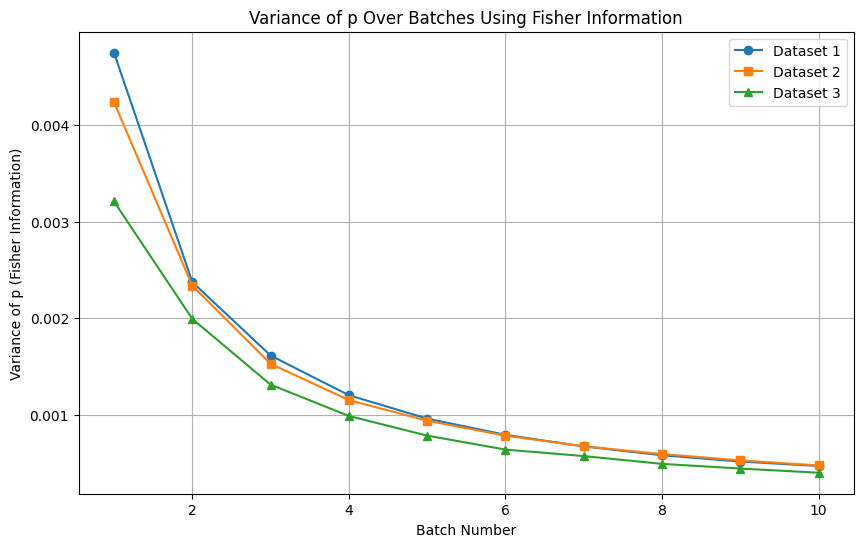

In [7]:
# Function to compute Fisher Information variance at each batch
def fisher_variance_updates(data, batch_size=50):
    alpha, beta = 1, 1  # Uniform prior Beta(1,1)
    variances = []
    expectations = []

    for i in range(0, len(data), batch_size):
        batch = data[i : i + batch_size]  # Take batch of 50 flips
        M_batch = sum(batch)  # Count heads
        N_batch = len(batch)  # Batch size (usually 50)

        # Update posterior parameters
        alpha += M_batch
        beta += (N_batch - M_batch)

        # Compute expectation
        expectation = alpha / (alpha + beta)

        # Compute Fisher Information variance
        fisher_var = (expectation * (1 - expectation)) / (alpha + beta)

        # Store results
        expectations.append(expectation)
        variances.append(fisher_var)

    return expectations, variances

# Compute Fisher variance updates
E1, Var1 = fisher_variance_updates(dataset1)
E2, Var2 = fisher_variance_updates(dataset2)
E3, Var3 = fisher_variance_updates(dataset3)

# Plot variance evolution over batches
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(Var1) + 1), Var1, label="Dataset 1", marker="o")
plt.plot(range(1, len(Var2) + 1), Var2, label="Dataset 2", marker="s")
plt.plot(range(1, len(Var3) + 1), Var3, label="Dataset 3", marker="^")

plt.xlabel("Batch Number")
plt.ylabel("Variance of p (Fisher Information)")
plt.title("Variance of p Over Batches Using Fisher Information")
plt.legend()
plt.grid()
plt.show()

**Part b) Stirling's Approximation**

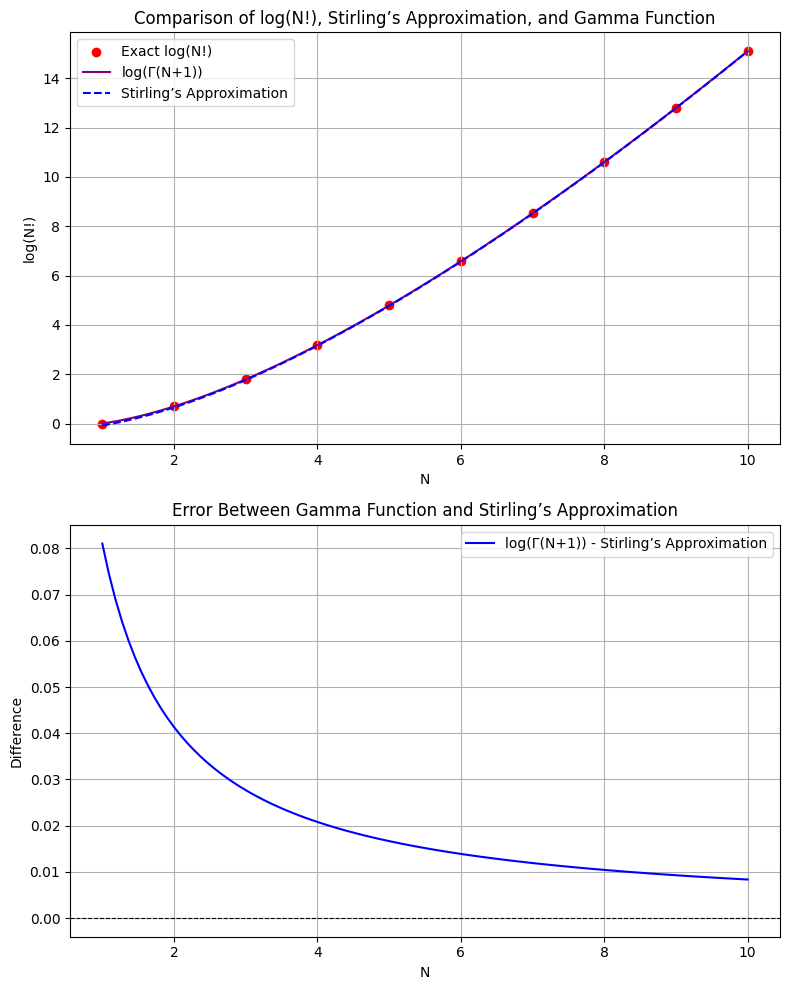

In [11]:
# Define range for N
N_values = np.arange(1, 11)  # Discrete values for scatter plot
N_smooth = np.linspace(1, 10, 100)  # Smooth range for curves

# Compute log factorial using exact values
log_fact = np.log(sp.factorial(N_values))

# Compute Stirling’s approximation
stirling_approx = N_values * np.log(N_values) - N_values + 0.5 * np.log(2 * np.pi * N_values)

# Compute Gamma function values
log_gamma_smooth = np.log(sp.gamma(N_smooth + 1))  # log(Γ(N+1))

# Compute the difference: log(Γ(N+1)) - Stirling’s approximation
stirling_smooth = N_smooth * np.log(N_smooth) - N_smooth + 0.5 * np.log(2 * np.pi * N_smooth)
difference = log_gamma_smooth - stirling_smooth

# Create figure with (2,1) subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# First plot: Log factorial vs Stirling's Approximation
ax[0].scatter(N_values, log_fact, label="Exact log(N!)", color="red", marker="o")
ax[0].plot(N_smooth, log_gamma_smooth, label="log(Γ(N+1))", linestyle="-", color="purple")
ax[0].plot(N_smooth, stirling_smooth, label="Stirling’s Approximation", linestyle="--", color="blue")
ax[0].set_xlabel("N")
ax[0].set_ylabel("log(N!)")
ax[0].set_title("Comparison of log(N!), Stirling’s Approximation, and Gamma Function")
ax[0].legend()
ax[0].grid()

# Second plot: Difference between log(Γ(N+1)) and Stirling’s Approximation
ax[1].plot(N_smooth, difference, label="log(Γ(N+1)) - Stirling’s Approximation", color="blue")
ax[1].axhline(0, linestyle="--", color="black", linewidth=0.8)  # Reference line at zero
ax[1].set_xlabel("N")
ax[1].set_ylabel("Difference")
ax[1].set_title("Error Between Gamma Function and Stirling’s Approximation")
ax[1].legend()
ax[1].grid()

# Show plots
plt.tight_layout()
plt.show()

**Part c) Bootstrapping**

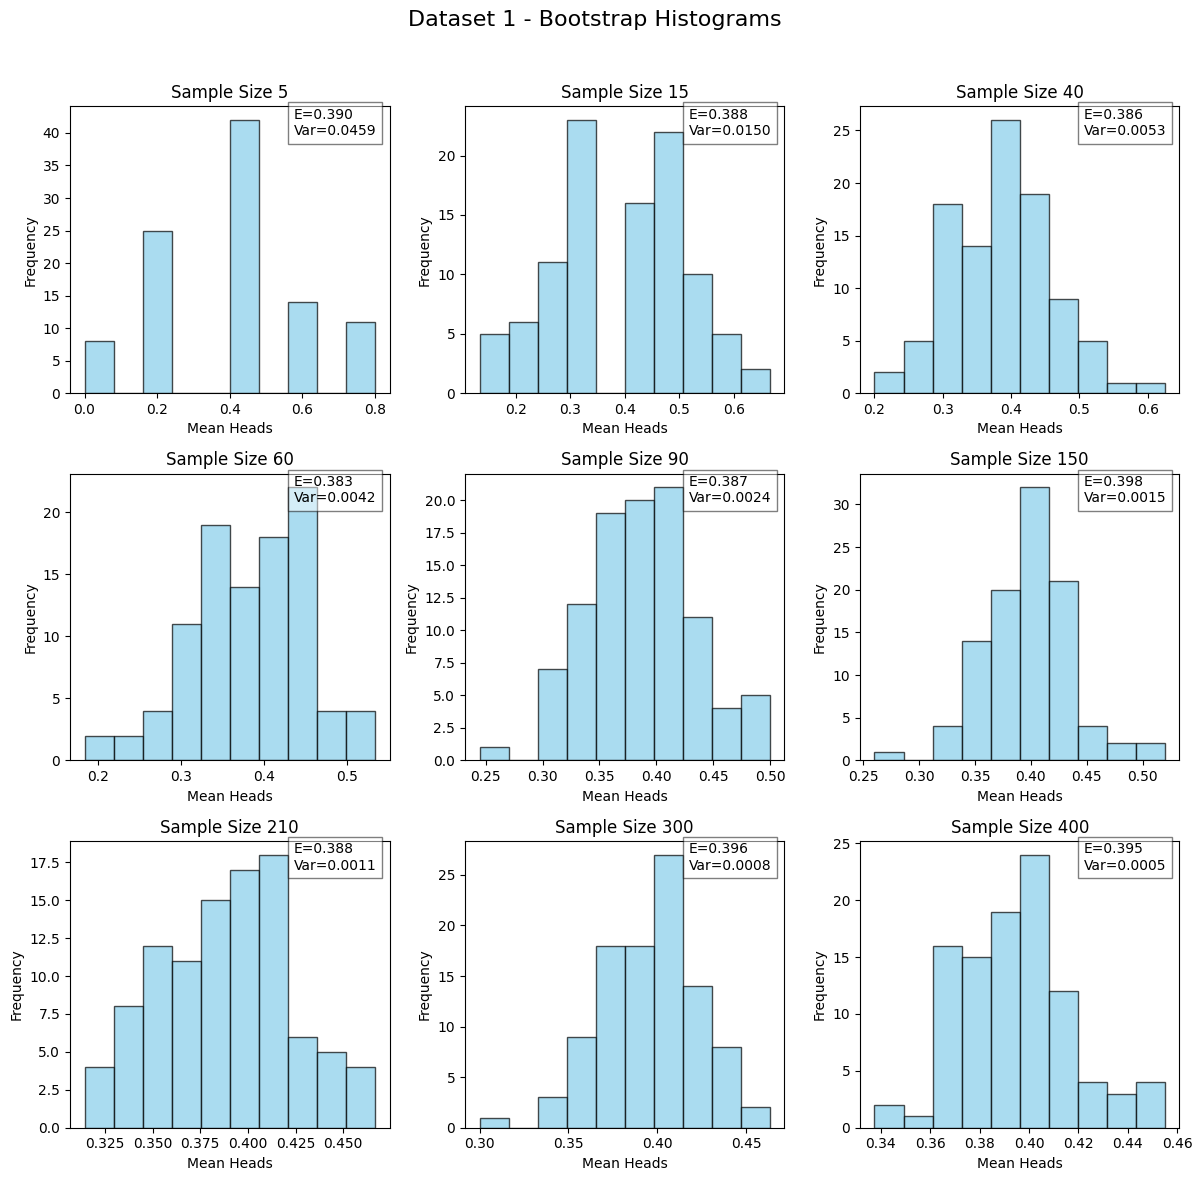

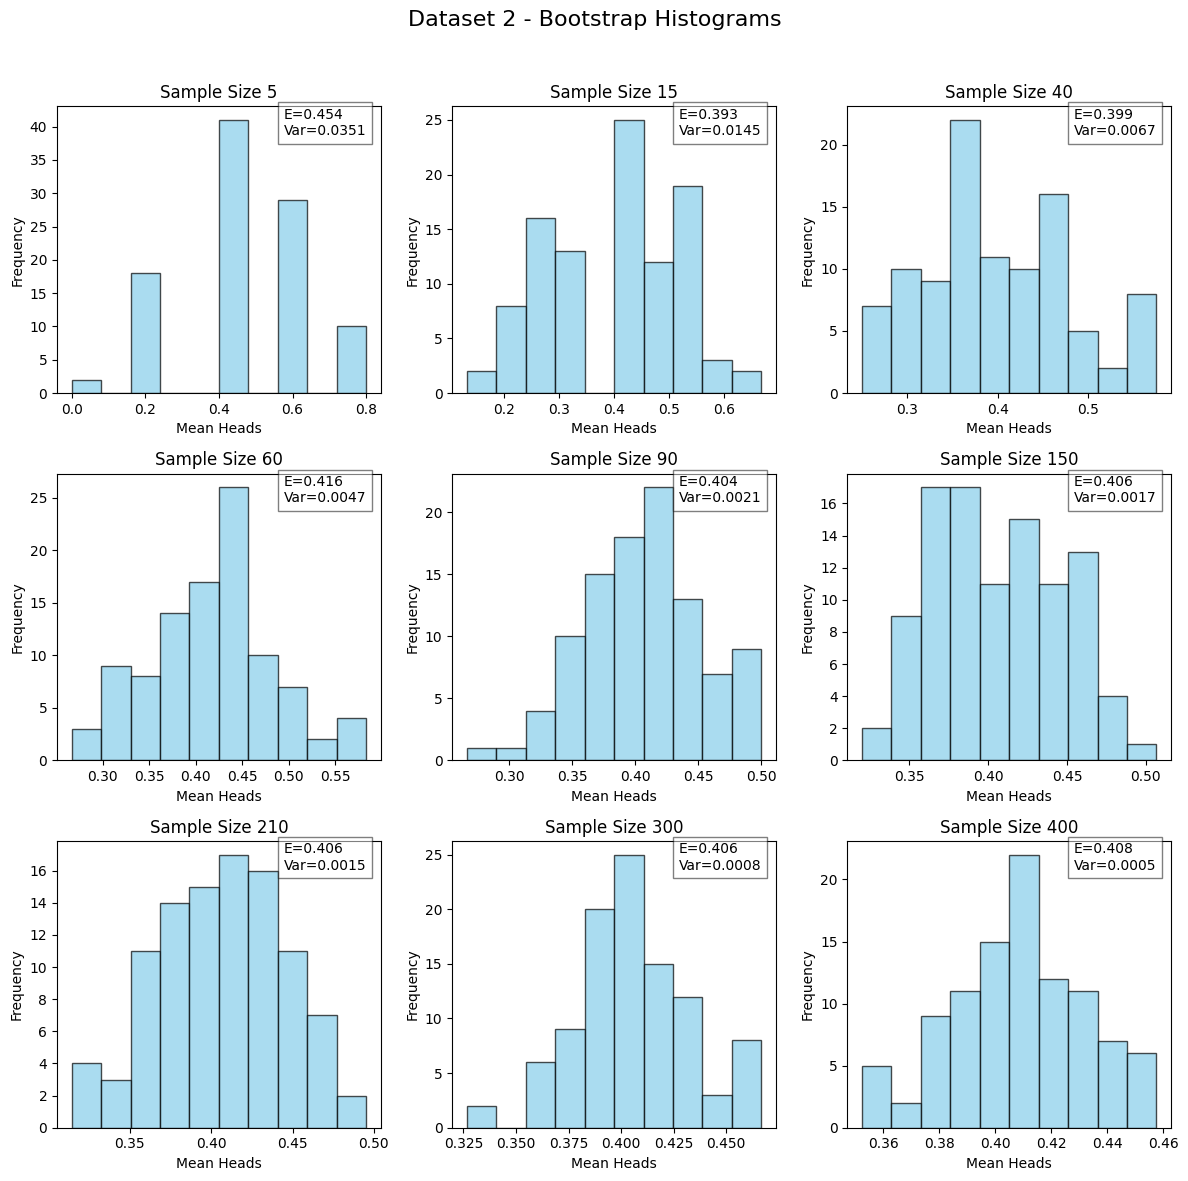

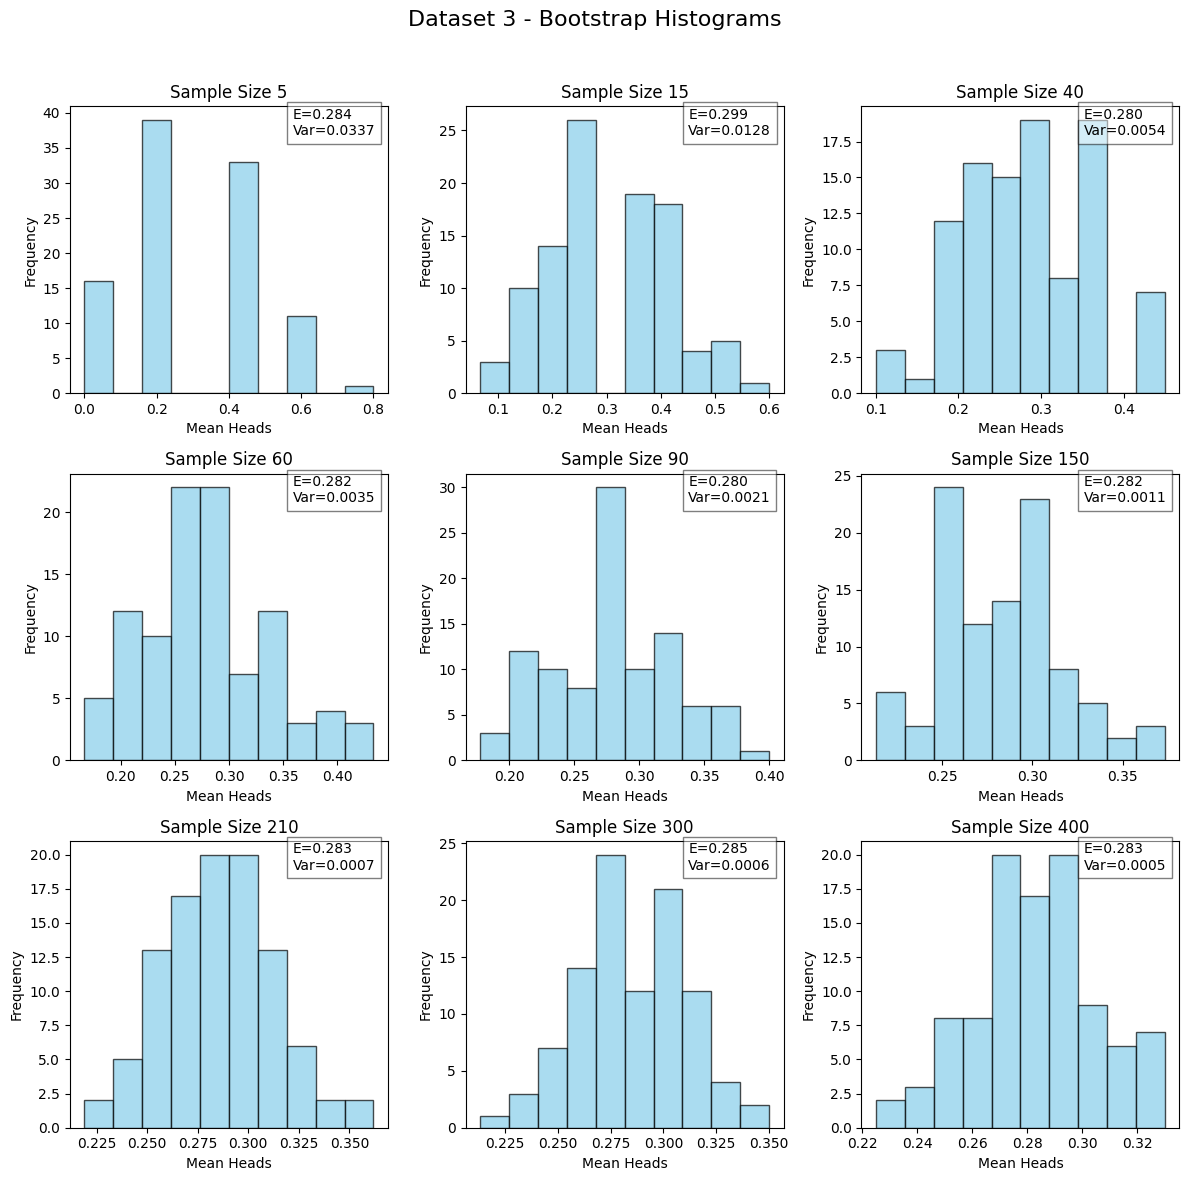

In [13]:
# Load datasets (Assuming files are in the working directory)
datasets = []
for i in range(1, 4):  # dataset_1.json, dataset_2.json, dataset_3.json
    with open(f"dataset_{i}.json", "r") as file:
        datasets.append(np.array(json.load(file), dtype=bool))  # Convert to NumPy Boolean array

# Sample sizes for bootstrap
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
bootstrap_iterations = 100  # Number of bootstrap samples per size

# Function to perform bootstrap sampling and calculate statistics
def bootstrap_statistics(data, sample_size, iterations=100):
    means = []
    for _ in range(iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))  # Mean number of Heads
    return np.array(means)

# Create (3,3) histogram subplots for each dataset
for dataset_idx, data in enumerate(datasets):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle(f"Dataset {dataset_idx + 1} - Bootstrap Histograms", fontsize=16)
    
    for i, size in enumerate(sample_sizes):
        row, col = divmod(i, 3)  # Convert index to 3x3 grid
        boot_means = bootstrap_statistics(data, size, bootstrap_iterations)
        
        # Plot histogram
        axes[row, col].hist(boot_means, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
        axes[row, col].set_title(f"Sample Size {size}")
        axes[row, col].set_xlabel("Mean Heads")
        axes[row, col].set_ylabel("Frequency")

        # Compute statistics
        expectation = np.mean(boot_means)
        variance = np.var(boot_means)

        # Annotate expectation and variance
        axes[row, col].text(0.7, 0.9, f"E={expectation:.3f}\nVar={variance:.4f}", 
                            transform=axes[row, col].transAxes, fontsize=10, 
                            bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
    plt.show()

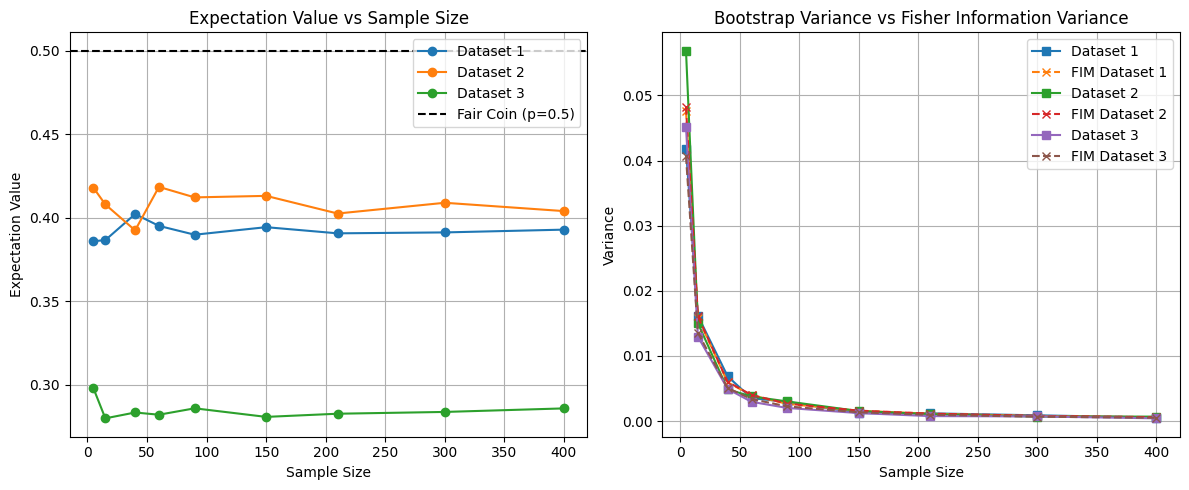

In [15]:
# Load datasets
datasets = []
for i in range(1, 4):  # dataset 1, 2, 3
    with open(f"dataset_{i}.json", "r") as file:
        datasets.append(np.array(json.load(file), dtype=bool))  # Convert to NumPy Boolean array

# Define sample sizes for bootstrap and Fisher calculation
sample_sizes = np.array([5, 15, 40, 60, 90, 150, 210, 300, 400])
bootstrap_iterations = 100

# Function to perform bootstrap sampling and calculate statistics
def bootstrap_statistics(data, sample_size, iterations=100):
    means = []
    for _ in range(iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))  # Mean number of Heads
    return np.mean(means), np.var(means)  # Expectation and Variance

# Function to compute Fisher Information variance
def fisher_information_variance(p, N):
    fisher_info = N / (p * (1 - p))  # Fisher Information
    return 1 / fisher_info  # Variance estimate

# Store results
bootstrap_means = []
bootstrap_vars = []
fisher_vars = []

# Compute statistics for each dataset
for dataset in datasets:
    dataset_mean = np.mean(dataset)  # True probability estimate
    dataset_boot_means = []
    dataset_boot_vars = []
    dataset_fisher_vars = []

    for N in sample_sizes:
        # Bootstrap statistics
        boot_mean, boot_var = bootstrap_statistics(dataset, N, bootstrap_iterations)
        dataset_boot_means.append(boot_mean)
        dataset_boot_vars.append(boot_var)

        # Fisher Information variance
        fisher_var = fisher_information_variance(dataset_mean, N)
        dataset_fisher_vars.append(fisher_var)

    bootstrap_means.append(dataset_boot_means)
    bootstrap_vars.append(dataset_boot_vars)
    fisher_vars.append(dataset_fisher_vars)

# Plot expectation values (bootstrap vs true mean)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(3):
    axes[0].plot(sample_sizes, bootstrap_means[i], marker='o', linestyle='-', label=f'Dataset {i+1}')
    axes[1].plot(sample_sizes, bootstrap_vars[i], marker='s', linestyle='-', label=f'Dataset {i+1}')
    axes[1].plot(sample_sizes, fisher_vars[i], marker='x', linestyle='--', label=f'FIM Dataset {i+1}')

# Expectation value plot
axes[0].axhline(0.5, linestyle='--', color='black', label='Fair Coin (p=0.5)')
axes[0].set_xlabel("Sample Size")
axes[0].set_ylabel("Expectation Value")
axes[0].set_title("Expectation Value vs Sample Size")
axes[0].legend()
axes[0].grid()

# Variance plot
axes[1].set_xlabel("Sample Size")
axes[1].set_ylabel("Variance")
axes[1].set_title("Bootstrap Variance vs Fisher Information Variance")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

# Task 2: Particle Decay

**Part a) Unknown Particle**

In [16]:
def estimate_decay_constant(file_path):
    # Load data from JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Convert data to a NumPy array
    decay_distances = np.array(data)
    
    # Estimate lambda (mean of decay distances)
    lambda_mle = np.mean(decay_distances)
    
    return lambda_mle

# File paths (update these if needed)
vacuum_file = "Vacuum_decay_dataset.json"
cavity_file = "Cavity_decay_dataset.json"

# Estimate decay constants
lambda_vacuum = estimate_decay_constant(vacuum_file)
lambda_cavity = estimate_decay_constant(cavity_file)

# Print results
print(f"Estimated decay constant for vacuum: {lambda_vacuum:.4f}")
print(f"Estimated decay constant for optical cavity: {lambda_cavity:.4f}")

Estimated decay constant for vacuum: 2.2530
Estimated decay constant for optical cavity: 3.2159


In an optical cavity, the decay constant is 
$$\lambda_{cavity} = \frac{c}{F_P \Gamma_0}$$
where $\Gamma_0$ is the vacuum decay rate, c is the speed of light, and $F_P$ is the Purcell Factor. <br>
In the optical cavity, the particle appears to make a resurgence in counts at around a decay distance of 7, whereas in vacuum the particle continues to decay as distance increases. 

In [ ]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return np.array(data)

def estimate_mixture_params(data, n_components=2):
    # Fit a Gaussian Mixture Model (GMM) to distinguish between the distributions
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(data.reshape(-1, 1))
    
    # Extract parameters
    means = gmm.means_.flatten()
    std_devs = np.sqrt(gmm.covariances_).flatten()
    weights = gmm.weights_

    # Assign the components based on shape (exponential should have lower mean)
    if means[0] < means[1]:  
        lambda_est = means[0]  # Exponential decay (assuming lower mean)
        mu_est, sigma_est = means[1], std_devs[1]  # Gaussian parameters
    else:
        lambda_est = means[1]
        mu_est, sigma_est = means[0], std_devs[0]

    return lambda_est, mu_est, sigma_est

# Load dataset (change the file name as needed)
file_path = "your_dataset.json"
data = load_data(file_path)

# Estimate parameters
lambda_mle, mu_mle, sigma_mle = estimate_mixture_params(data)

# Print results
print(f"Estimated decay constant (λ): {lambda_mle:.4f}")
print(f"Estimated Gaussian mean (µ): {mu_mle:.4f}")
print(f"Estimated Gaussian standard deviation (σ): {sigma_mle:.4f}")

**Part b) Null Hpyothesis**